## Exploratory analysis notebook

Use this notebook for adding new report requirements into scope

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### NOTE: All endzone heatmap content moved to "Endzone Heatmap.ipynb"

### Data exploration

Making notes on the Yewwah-SUIS game I just watched/ did data entry for.

In [2]:
import pandas as pd

In [56]:
df = pd.read_csv("YW-Dogs/Passes vs. Suis 2017-03-24_16-10.csv")

In [57]:
df[df.iloc[:,9]==1].iloc[:,(3,4,19,20,21,22)]

,Thrower,Receiver,Start X (0 -> 1 = left sideline -> right sideline),Start Y (0 -> 1 = back of opponent endzone -> back of own endzone),End X (0 -> 1 = left sideline -> right sideline),End Y (0 -> 1 = back of opponent endzone -> back of own endzone)
39,Julia Zhang,Simon Li,0.669355,0.505964,0.526882,0.083499
121,Julia Zhang,Bobby,0.072581,0.415507,0.494624,0.108350
141,#17 Kevin Yang,Bobby,0.266129,0.305169,0.529570,0.105368
143,#17 Kevin Yang,#18 Danielle Xu,0.198925,0.241551,0.456989,0.129225


Note: I accidentally used "Julia Zhang" for "James Zhang" the entire game... will need some standardized way of referring to each player.  It is possible to edit player names simply using pandas, but annoying and manual.

In [60]:
#df.loc[df.Thrower=="Julia Zhang","Thrower"] = "#89 James Zhu"
#df.loc[df.Thrower=="#89 QB (James Zhu)","Thrower"] = "Julia Zhang"
#df.loc[df.Receiver=="Julia Zhang","Receiver"] = "#89 James Zhu"
#df.loc[df.Receiver=="#89 QB (James Zhu)","Receiver"] = "Julia Zhang"
#df.to_csv("YW-Dogs/Passes vs. Suis 2017-03-24_16-10.csv")  ### Do this once, to fix wrongly input names

### Huck completion percentage

In [55]:
df = pd.read_csv("YW-Dogs/Passes vs. Suis 2017-03-24_16-10.csv")
huckthrows = df[df["Huck? (> 40m)"]==1]
print "Huck completion percentage:\n",(1 - huckthrows.groupby(by="Thrower")["Turnover?"].mean())*100
print "\n\nHuck attempts:\n",huckthrows.groupby(by="Thrower")["Turnover?"].count()

Huck completion percentage:
Thrower
#17 Kevin Yang     0.0
#89 James Zhu     25.0
Name: Turnover?, dtype: float64


Huck attempts:
Thrower
#17 Kevin Yang    3
#89 James Zhu     4
Name: Turnover?, dtype: int64


### Dump vs upfield percentages

In [133]:
df = pd.read_csv("YW-Dogs/Passes vs. Suis 2017-03-24_16-10.csv")
total_throws = df.Thrower.value_counts().sort_values(ascending=False)
players = total_throws.index
total_dumps_thrown = df[df["Dump?"]==1].groupby(by="Thrower")["Thrower error?"].count().reindex(players,fill_value=0)
dump_errors_thrown = df[df["Dump?"]==1].groupby(by="Thrower")["Thrower error?"].sum().reindex(players,fill_value=0)
total_dumps_rec    = df[df["Dump?"]==1].groupby(by="Receiver")["Receiver error?"].count().reindex(players,fill_value=0)
dump_errors_rec    = df[df["Dump?"]==1].groupby(by="Receiver")["Receiver error?"].sum().reindex(players,fill_value=0)

#print "\n\nThrow attempts:\n", df.groupby(by="Thrower")["Dump?"].count().to_string()
#print "\n\nDump throws attempted:\n", total_dumps_thrown.to_string()
#print "\n\nDump error pct (throwing)\n", np.round(100*(dump_errors_thrown / total_dumps_thrown),1).to_string()
#print "\n\nDump receptions attempted:\n", total_dumps_rec.to_string()
#print "\n\nDump error pct (receiving):\n",np.round(100*dump_errors_rec / total_dumps_rec,1).to_string()
#print "Turnover rate from dumping (throws):\n",df.groupby(by="Thrower")["Dump?"].count()

df_dumps   = pd.DataFrame(index=players)
df_dumps["Throw attempts"]             = total_throws
df_dumps["Dump %"]                     = np.round(100*total_dumps_thrown / total_throws,1)
df_dumps["Dump throws attempted"]      = total_dumps_thrown
df_dumps["Dump error % (throwing)"]    = np.round(100*(dump_errors_thrown / total_dumps_thrown),1)
df_dumps["Dump receptions attempted"]  = total_dumps_rec
df_dumps["Dump error % (receiving)"]   = np.round(100*dump_errors_rec / total_dumps_rec,1)
df_dumps

,Throw attempts,Dump %,Dump throws attempted,Dump error % (throwing),Dump receptions attempted,Dump error % (receiving)
#89 James Zhu,63,22.2,14,28.6,12,41.7
#17 Kevin Yang,41,17.1,7,0.0,10,0.0
#0 John Yan,22,40.9,9,11.1,11,9.1
#18 Danielle Xu,4,50.0,2,0.0,0,NaN
#23 GayGay (Lancelot Li),4,50.0,2,50.0,0,NaN
Max,3,33.3,1,100.0,0,NaN
Michelle Ma,3,33.3,1,0.0,4,0.0
Bobby,2,50.0,1,0.0,1,0.0
Soap,2,0.0,0,NaN,0,NaN
Simon Li,2,100.0,2,0.0,0,NaN


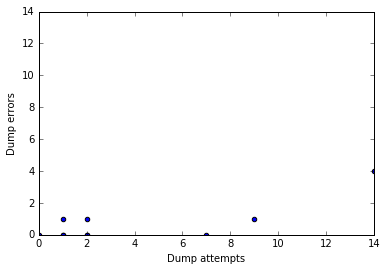

In [143]:
scatter(df_dumps["Dump throws attempted"],dump_errors_thrown)
xlim(0,df_dumps["Dump throws attempted"].max()); ylim(0,df_dumps["Dump throws attempted"].max())
xlabel("Dump attempts");ylabel("Dump errors")

### Goal: 

Plot all possessions, extra graphics for turnovers, stalls, receiver errors, etc.

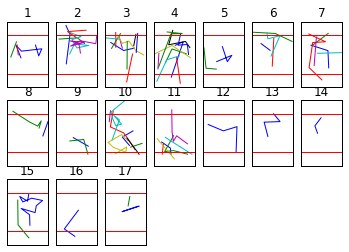

In [86]:
df = pd.read_csv("YW-Dogs/Passes vs. Suis 2017-03-24_16-10.csv")

point = np.unique(df.Point)

i=1
for pt in point:
    plt.subplot(3,7,i)
    possessions = np.unique(df.loc[df.Point==pt,"Possession"])
    for poss in possessions:
        Xs = df.loc[(df.Point==pt)&(df.Possession==poss),"Start X (0 -> 1 = left sideline -> right sideline)"].tolist()
        Ys = df.loc[(df.Point==pt)&(df.Possession==poss),"Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)"].tolist()
        turn_or_goal_x = df.loc[(df.Point==pt)&(df.Possession==poss),"End X (0 -> 1 = left sideline -> right sideline)"].tolist()[-1]
        turn_or_goal_y = df.loc[(df.Point==pt)&(df.Possession==poss),"End Y (0 -> 1 = back of opponent endzone -> back of own endzone)"].tolist()[-1]
        Xs += [turn_or_goal_x]
        Ys += [turn_or_goal_y]        
        plt.plot(Xs,Ys)
    plt.xticks([]);plt.yticks([])
    plt.xlim(0,1);plt.ylim(0,1)
    
    ## endzones
    normalized_line = 25. / (25+70+25)  ## normalized between 0 and 1, like the X-Y coordinates
    plt.plot([0,1],[normalized_line,normalized_line],'r')
    plt.plot([0,1],[1-normalized_line,1-normalized_line],'r')
    plt.title(pt)
    i+=1